In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "insurance.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mirichoi0218/insurance",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:\n", df.head())


/tmp/ipython-input-2-2913040848.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# EDA

In [ ]:
print(df.shape)
print("*" * 30)
print("total missing")
print(df.isna().sum())

(1338, 7)
******************************
total missing
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
# Create age bins
bins_age = [18, 30, 40, 50, 60, np.inf]
labels_age = ['18-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, right=False)

In [ ]:
# Create bmi bins
bins_bmi = [0, 18.5, 25, 30, 40, np.inf]
labels_bmi = ['underweight', 'healthy range', 'overweight', 'obesity', 'severe obesity']
df['bmi_group'] = pd.cut(df['bmi'], bins=bins_bmi, labels=labels_bmi, right=False)

In [ ]:
df['age_group'].unique()

['18-29', '30-39', '40-49', '60+', '50-59']
Categories (5, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60+']

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns
print(numerical_cols)
print(categorical_cols)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Index(['sex', 'smoker', 'region', 'age_group', 'bmi_group'], dtype='object')


categorical


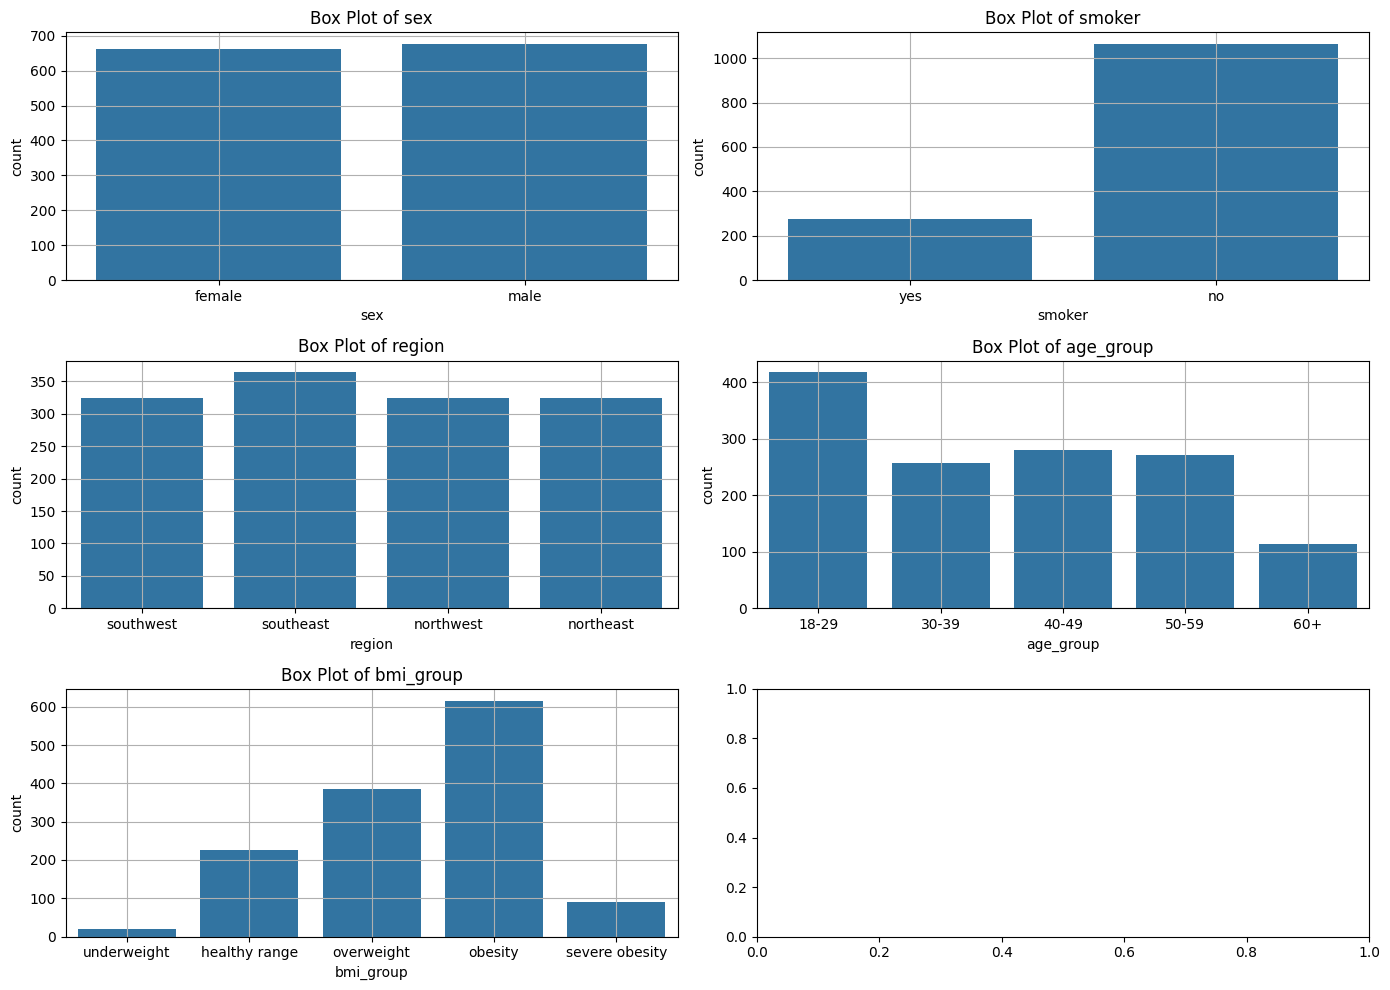

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].grid(True)

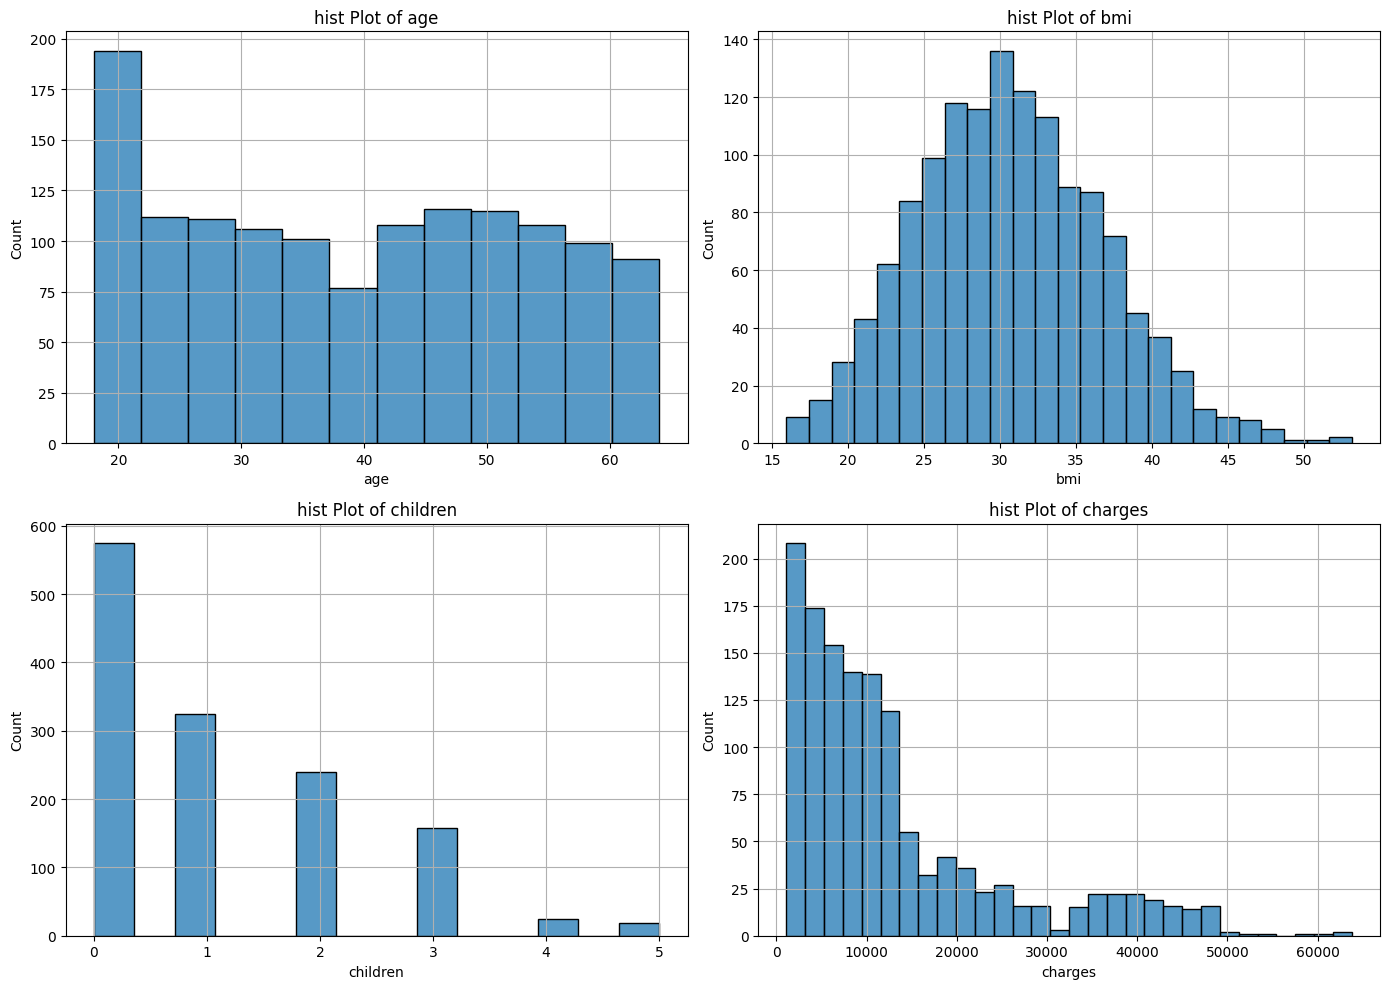

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10)) # Create a 2x2 grid of subplots
axes = axes.flatten() # Flatten the 2x2 array of axes to easily iterate through it

for i, col in enumerate(numerical_cols):
    sns.histplot(x=df[col], ax=axes[i]) # Send the subplot axis (axes[i]) to sns.boxplot
    axes[i].set_title(f'hist Plot of {col}') # Set the title for each subplot# Set the X-axis label for each subplot
    axes[i].grid(True)
    plt.tight_layout() # Show Grid

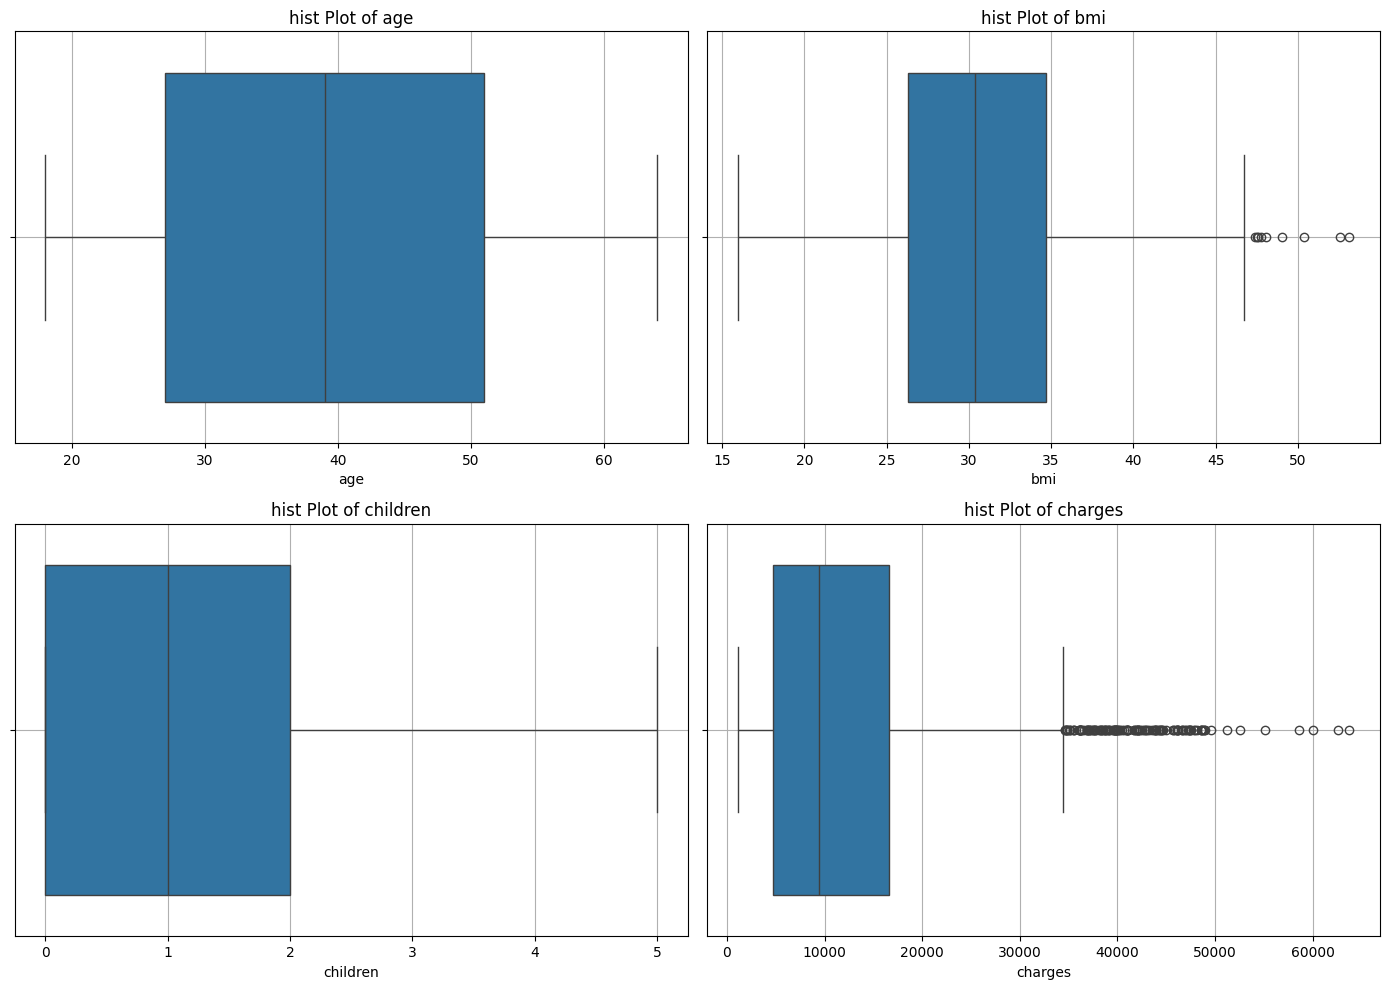

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'hist Plot of {col}')
    axes[i].grid(True)
    plt.tight_layout()

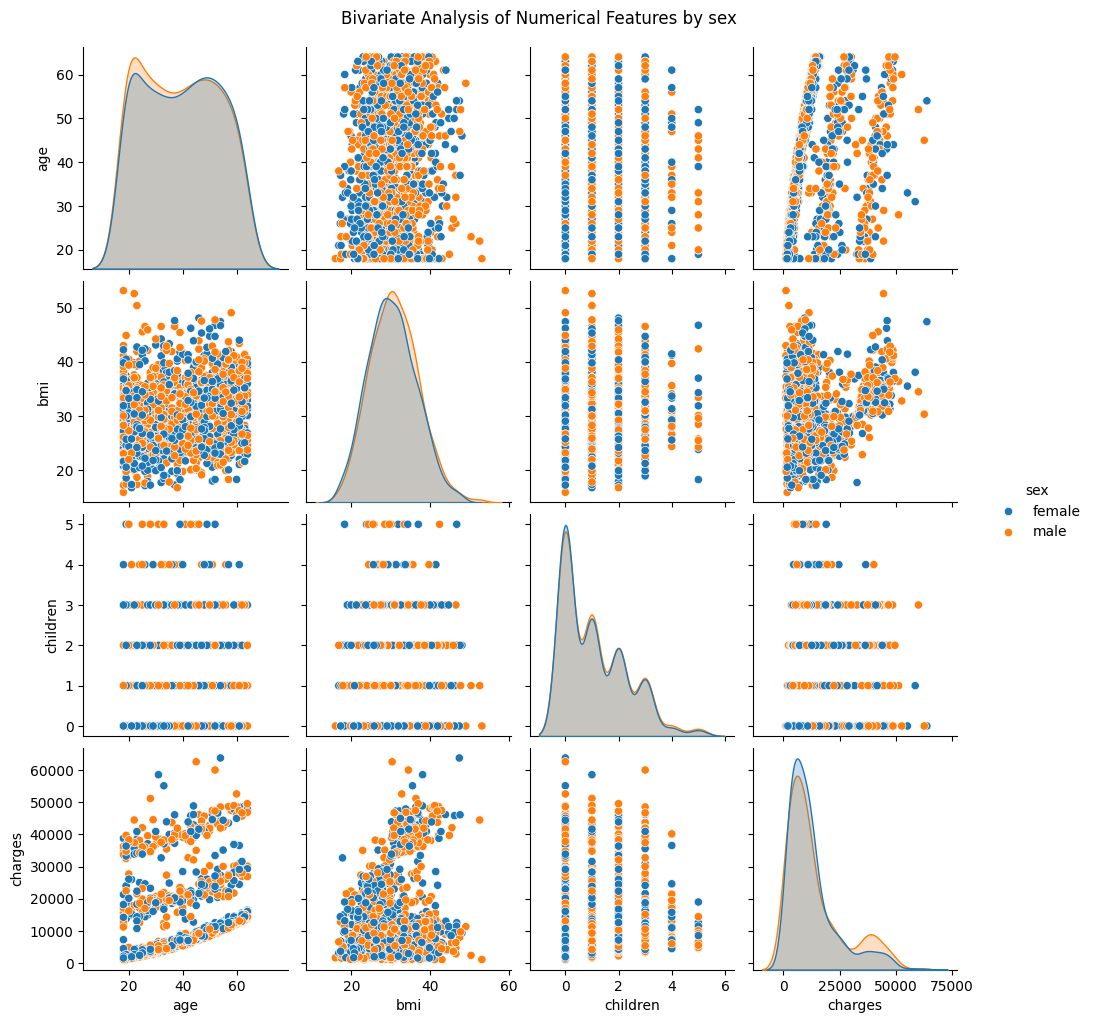

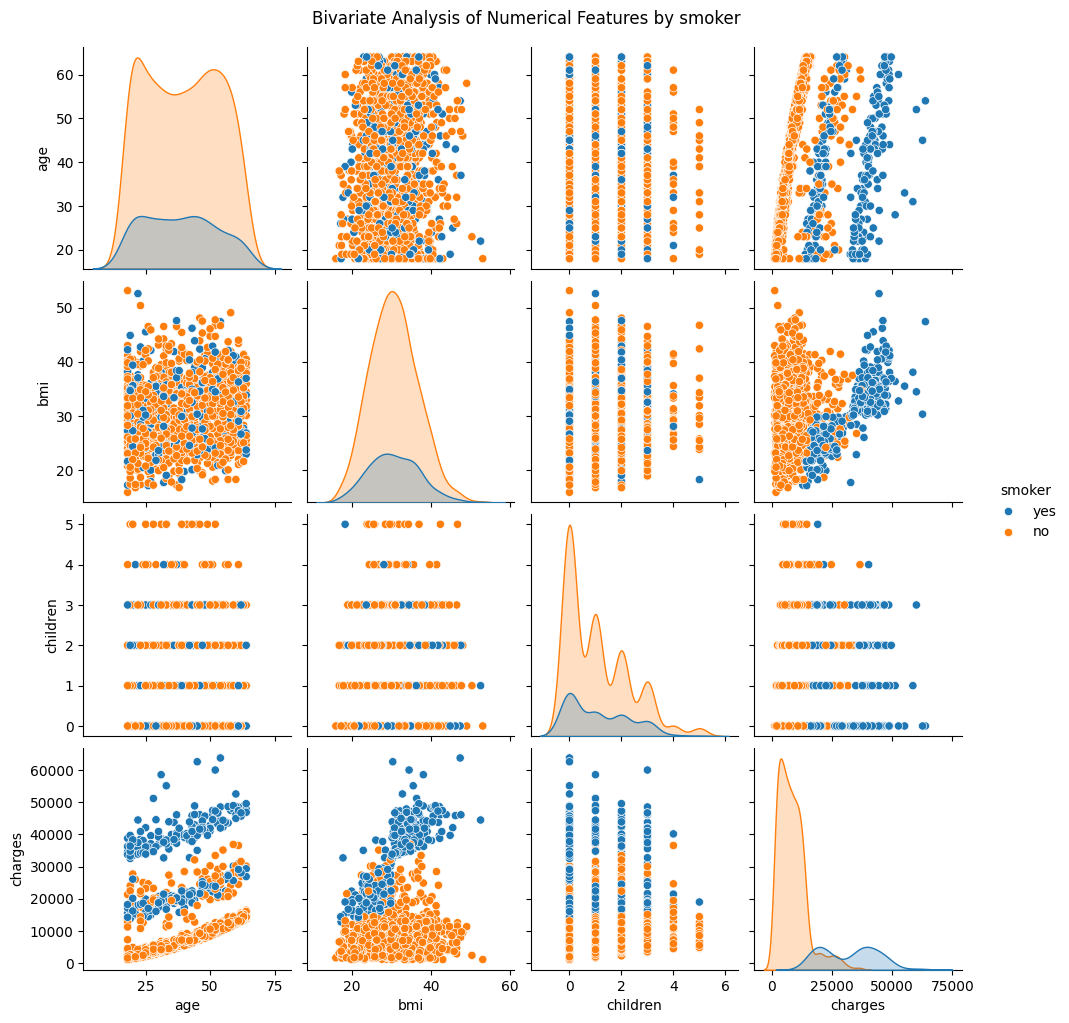

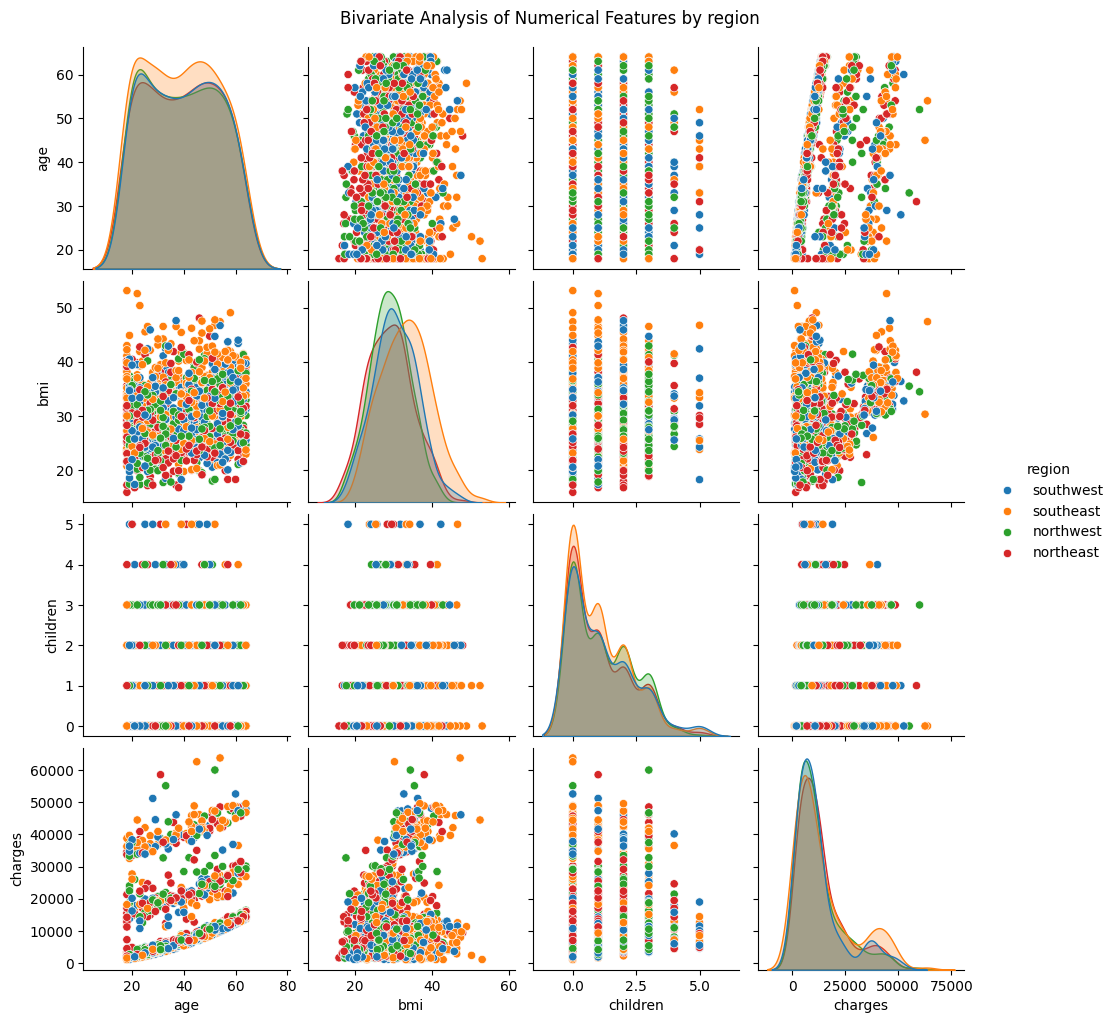

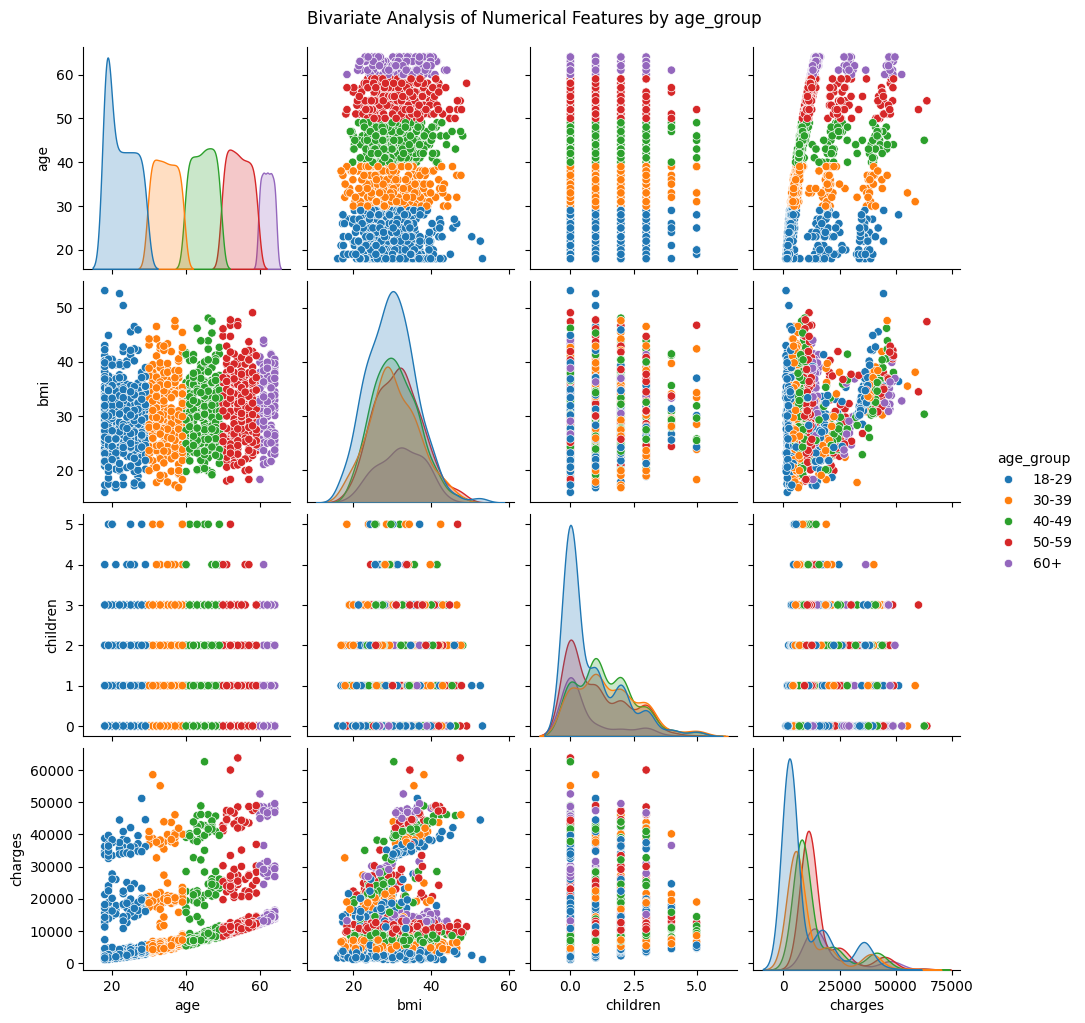

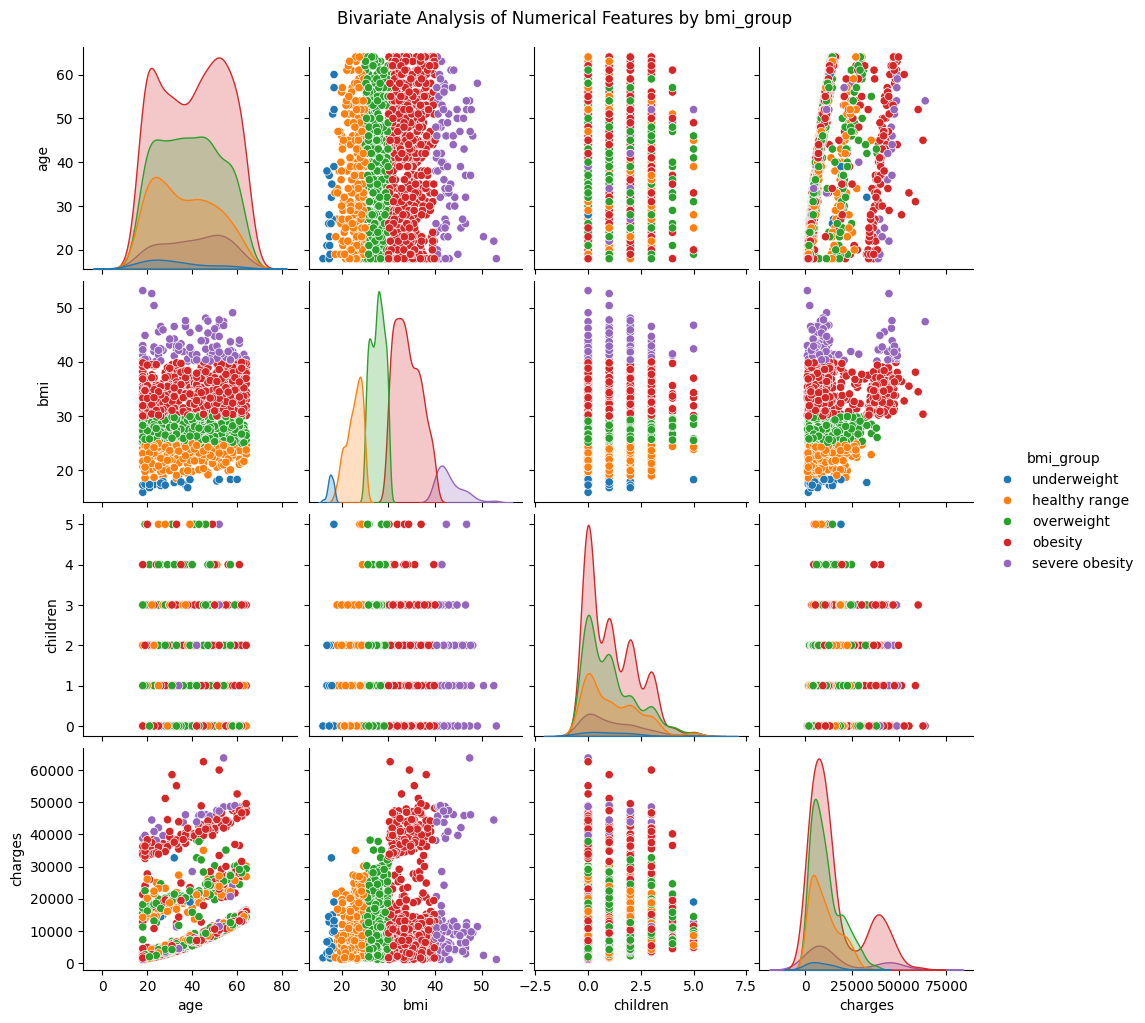

In [ ]:
for i, col in enumerate(categorical_cols):
  sns.pairplot(df, hue=col)
  plt.suptitle(f'Bivariate Analysis of Numerical Features by {col} ', y=1.02)
  plt.show()



1. OneHotEncoder --> smoker, sex, region, age_group
2. OrdinalEncoder --> age_group, bmi_group
3. PowerTransformer --> charges, age, bmi, children


In [ ]:
df_co = df.copy()

In [ ]:
X = df_co.drop('charges', axis=1)
y = df_co['charges']

In [ ]:
print(f"catagory colmun : {X.select_dtypes(exclude='number').columns}")
print(f"number colmun : {X.select_dtypes(include='number').columns}")

catagory colmun : Index(['sex', 'smoker', 'region', 'age_group', 'bmi_group'], dtype='object')
number colmun : Index(['age', 'bmi', 'children'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder ,PowerTransformer ,OrdinalEncoder
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#ระบุคอลัมที่จะทำ
categorical_OneHOt = ['smoker', 'sex', 'region']
categorical_Ordinal = ['age_group', 'bmi_group']
numerical_PowerTransformer = ['age', 'bmi', 'children']
target_PowerTransformer = ['charges']

#define preprocess
Sort_age_group = ['18-29', '30-39', '40-49', '50-59', '60+']
Sort_bmi_group = ['underweight', 'healthy range', 'overweight', 'obesity', 'severe obesity']

numeric_transformer = Pipeline(steps=[
    ('Power', PowerTransformer()),
    ('scaler', StandardScaler())
])

categorical_transformer_OneHot = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

ordinal_encoder = OrdinalEncoder(categories=[Sort_age_group, Sort_bmi_group])

categorical_transformer_Ordinal = Pipeline(steps=[('ordinal', ordinal_encoder)])

#make preprocess
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_PowerTransformer),
        ('cat_OneHot', categorical_transformer_OneHot, categorical_OneHOt),
        ('cat_Ordinal', categorical_transformer_Ordinal, categorical_Ordinal),
    ])

models_to_test = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR() }


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model
results_list = []
for model_name, model in models_to_test.items():
    print(f"--- Training {model_name} ---")

    final_model = TransformedTargetRegressor(
        regressor=model,
        transformer=PowerTransformer()
    )

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', final_model)
    ])

    pipeline.fit(X_train, y_train)

    predictions = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    results_list.append({
        "Model": model_name,
        "MAE": mae,
        "RMSE": rmse,
        "R-squared": r2
    })

results_df = pd.DataFrame(results_list)
results_df.set_index('Model', inplace=True)

print("\n\n--- Model Comparison Results ---")
print(results_df.sort_values(by='RMSE', ascending=True))

--- Training Linear Regression ---
--- Training Random Forest ---
--- Training Gradient Boosting ---
--- Training Support Vector Regressor (SVR) ---


--- Model Comparison Results ---
                                        MAE         RMSE  R-squared
Model                                                              
Random Forest                   2111.041840  4453.622279   0.872239
Gradient Boosting               2068.151066  4487.935652   0.870263
Support Vector Regressor (SVR)  1996.341826  4673.313287   0.859323
Linear Regression               3683.514139  6913.467822   0.692133


**Add Cross-Varlidation**

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder ,PowerTransformer ,OrdinalEncoder
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

#ระบุคอลัมที่จะทำ
categorical_OneHOt = ['smoker', 'sex', 'region']
categorical_Ordinal = ['age_group', 'bmi_group']
numerical_PowerTransformer = ['age', 'bmi', 'children']

#define preprocess
Sort_age_group = ['18-29', '30-39', '40-49', '50-59', '60+']
Sort_bmi_group = ['underweight', 'healthy range', 'overweight', 'obesity', 'severe obesity']

numeric_transformer = Pipeline(steps=[
    ('Power', PowerTransformer()),
    ('scaler', StandardScaler())
])

categorical_transformer_OneHot = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

ordinal_encoder = OrdinalEncoder(categories=[Sort_age_group, Sort_bmi_group])

categorical_transformer_Ordinal = Pipeline(steps=[('ordinal', ordinal_encoder)])

#make preprocess
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_PowerTransformer),
        ('cat_OneHot', categorical_transformer_OneHot, categorical_OneHOt),
        ('cat_Ordinal', categorical_transformer_Ordinal, categorical_Ordinal),
    ])

models_to_test = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR()
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Model
scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}


results_list = []


for model_name, model in models_to_test.items():
    print(f"--- Cross-validating {model_name} ---")

    final_model = TransformedTargetRegressor(
        regressor=model,
        transformer=PowerTransformer()
    )

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', final_model)
    ])

    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring_metrics)

    mean_mae = -1 * cv_results['test_mae'].mean()
    mean_rmse = -1 * cv_results['test_rmse'].mean()
    mean_r2 = cv_results['test_r2'].mean()

    results_list.append({
        "Model": model_name,
        "Mean MAE": mean_mae,
        "Mean RMSE": mean_rmse,
        "Mean R-squared": mean_r2
    })


results_df = pd.DataFrame(results_list)
results_df.set_index('Model', inplace=True)

print("\n\n--- Model Comparison Results (from Cross-Validation) ---")

print(results_df.sort_values(by='Mean RMSE', ascending=True))

--- Cross-validating Linear Regression ---
--- Cross-validating Random Forest ---
--- Cross-validating Gradient Boosting ---
--- Cross-validating Support Vector Regressor (SVR) ---


--- Model Comparison Results (from Cross-Validation) ---
                                   Mean MAE    Mean RMSE  Mean R-squared
Model                                                                   
Random Forest                   2270.096825  4682.279637        0.842625
Gradient Boosting               2379.938406  4786.710684        0.836412
Support Vector Regressor (SVR)  2247.052315  4838.479664        0.832520
Linear Regression               4078.210138  7582.385981        0.594391


Training and prediction complete. Generating plots...


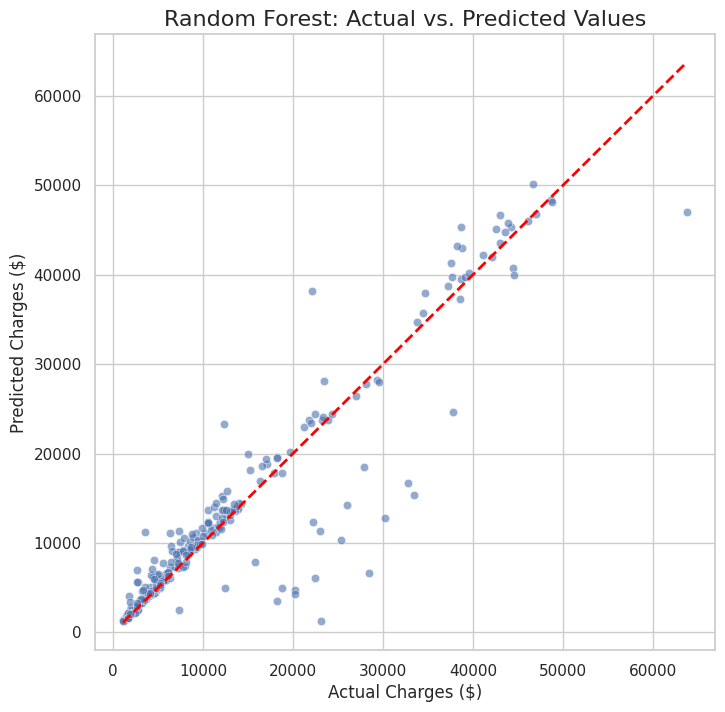

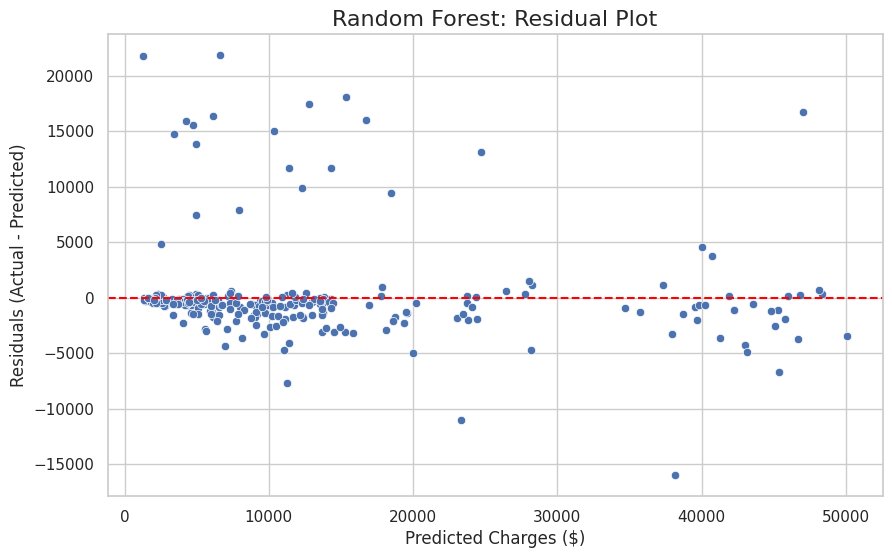

--- 📊 Generating Feature Importance for Random Forest ---


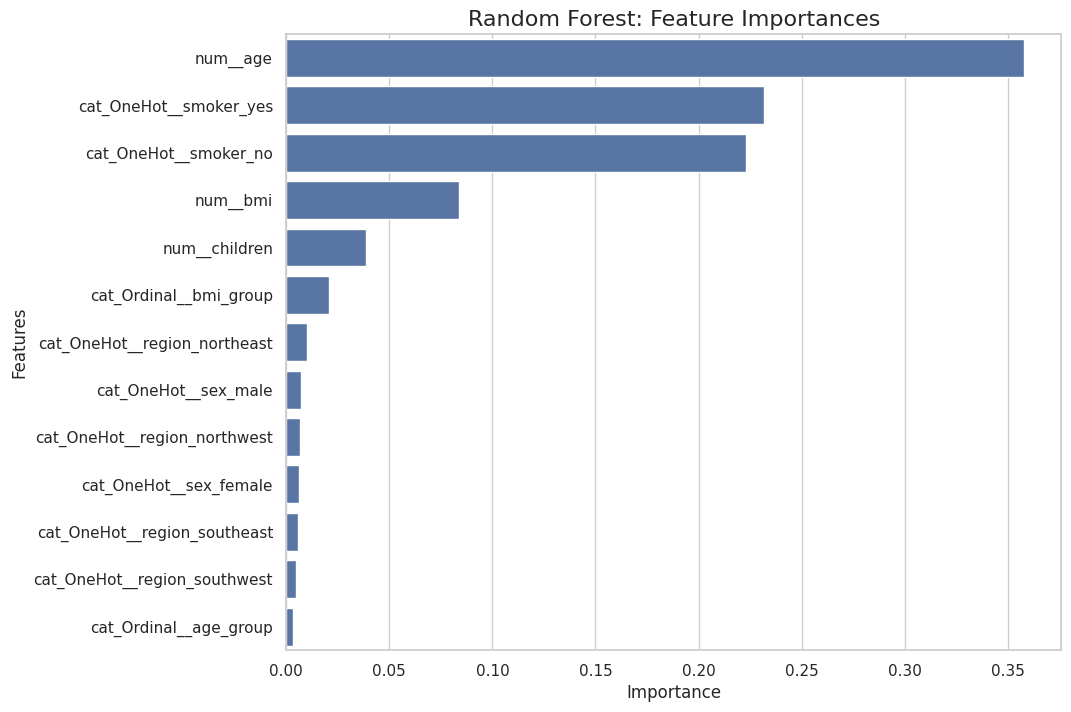

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor

#choose best model
best_model_name = results_df.sort_values(by='Mean RMSE', ascending=True).index[0]
best_model_class = models_to_test[best_model_name]

#make pipeline
best_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # ใช้ preprocessor ตัวเดิม
    ('regressor', TransformedTargetRegressor(
        regressor=best_model_class,
        transformer=PowerTransformer()
    ))
])

# fit model
best_model_pipeline.fit(X_train, y_train)

# predict
predictions = best_model_pipeline.predict(X_test)

#VIZ
sns.set_theme(style="whitegrid")

# SCATTER PLOT (ACTUAL VS. PREDICTED)
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.title(f'{best_model_name}: Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Charges ($)', fontsize=12)
plt.ylabel('Predicted Charges ($)', fontsize=12)
plt.show()

# RESIDUAL PLOT
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title(f'{best_model_name}: Residual Plot', fontsize=16)
plt.xlabel('Predicted Charges ($)', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.show()

# FEATURE IMPORTANCE PLOT
if hasattr(best_model_pipeline.named_steps['regressor'].regressor_, 'feature_importances_'):
    print(f"--- 📊 Generating Feature Importance for {best_model_name} ---")

    feature_names = best_model_pipeline.named_steps['preprocessor'].get_feature_names_out()
    importances = best_model_pipeline.named_steps['regressor'].regressor_.feature_importances_
    importances_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x=importances_series.values, y=importances_series.index)
    plt.title(f'{best_model_name}: Feature Importances', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.show()

In [ ]:
results_df

,Mean MAE,Mean RMSE,Mean R-squared
Model,,,
Linear Regression,4078.210138,7582.385981,0.594391
Random Forest,2270.096825,4682.279637,0.842625
Gradient Boosting,2379.938406,4786.710684,0.836412
Support Vector Regressor (SVR),2247.052315,4838.479664,0.832520
